In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from scipy import stats
plt.style.use('ggplot')
%matplotlib inline

In [123]:

for year in range(1980, 2020):
    aqi_single_year = pd.read_csv(f'data/daily_aqi_metro/daily_aqi_by_cbsa_{year}.csv')
    aqi_single_year['Date'] = pd.to_datetime(aqi_single_year['Date'], format='%Y-%m-%d', errors='ignore')
    start_date = f'{year}-03-01'
    end_date = f'{year}-06-30'
    mask = (aqi_single_year['Date'] >= start_date) & (aqi_single_year['Date'] <= end_date)
    aqi_single_year = aqi_single_year.loc[mask]
    aqi_single_year.to_csv(f'data/daily_aqi_metro/daily_aqi_by_cbsa_{year}_cleaned.csv')

In [124]:
aggregate_cbsa_aqi_df = pd.DataFrame()
for year in range(1980, 2020):
    aqi_single_year = pd.read_csv(f'data/daily_aqi_metro/daily_aqi_by_cbsa_{year}_cleaned.csv', index_col=0)
    aggregate_cbsa_aqi_df = pd.concat([aggregate_cbsa_aqi_df, aqi_single_year])

In [132]:
aggregate_cbsa_aqi_df.to_csv('data/daily_aqi_metro/aggregate_aqi_by_cbsa.csv')

In [129]:
aggregate_cbsa_aqi_df['CBSA'].unique()

array(['Akron, OH', 'Albany-Schenectady-Troy, NY', 'Albuquerque, NM',
       'Alexandria, LA', 'Allentown-Bethlehem-Easton, PA-NJ', 'Alma, MI',
       'Altoona, PA', 'Ames, IA', 'Anchorage, AK', 'Ann Arbor, MI',
       'Appleton, WI', 'Asheville, NC', 'Ashtabula, OH',
       'Atlanta-Sandy Springs-Roswell, GA', 'Atlantic City-Hammonton, NJ',
       'Augusta-Richmond County, GA-SC', 'Augusta-Waterville, ME',
       'Austin-Round Rock, TX', 'Bakersfield, CA',
       'Baltimore-Columbia-Towson, MD', 'Bangor, ME', 'Barre, VT',
       'Baton Rouge, LA', 'Battle Creek, MI', 'Bay City, MI',
       'Beaumont-Port Arthur, TX', 'Bennington, VT', 'Berlin, NH-VT',
       'Billings, MT', 'Binghamton, NY', 'Birmingham-Hoover, AL',
       'Bishop, CA', 'Bismarck, ND', 'Boise City, ID',
       'Boston-Cambridge-Newton, MA-NH', 'Boulder, CO',
       'Bridgeport-Stamford-Norwalk, CT', 'Brunswick, GA',
       'Buffalo-Cheektowaga-Niagara Falls, NY',
       'Burlington-South Burlington, VT', 'Butte-Silver

In [131]:
daily_aqi_2020_total_df['ReportingArea'].unique()


array(['Mississippi Gulf Coast', 'Saint Louis', 'Missoula', 'Bozeman',
       'Lincoln', 'Reno-Sparks', 'Las Vegas', 'Laconia', 'Newark',
       'Albuquerque', 'Cleveland-Akron-Lorain', 'Tulsa', 'Portland',
       'Pittsburgh', 'Philadelphia', 'Narragansett', 'Charleston',
       'Aberdeen', 'Nashville', 'Austin', 'Houston-Galveston-Brazoria',
       'Dallas-Fort Worth', 'San Antonio', 'Salt Lake City', 'Burlington',
       'Richmond', 'Hampton Roads', 'Greenbrier County', 'Milwaukee',
       'Jacksonville', 'Madison', 'Little Rock-North Little Rock',
       'Sacramento', 'S Central LA CO', 'NW Coastal LA', 'San Francisco',
       'Denver-Boulder', 'Hartford', 'Delaware',
       'Metropolitan Washington', 'Pensacola', 'Miami', 'Orlando',
       'Atlanta', 'Honolulu', 'Soda Springs (seasonal)',
       'New York City Region', 'Chicago', 'Boise', 'Springfield',
       'Indianapolis', 'Rock Island-Moline', 'Des Moines', 'Wichita',
       'Lexington', 'New Orleans', 'Southwest Coast',
     

In [138]:
region_relation_dct = {'Mississippi Gulf Coast': 'Gulfport-Biloxi-Pascagoula, MS',
                       'Saint Louis': 'St. Louis, MO-IL',
                       'Missoula': 'Missoula, MT',
                       'Bozeman': 'Bozeman, MT',
                       'Lincoln': 'Lincoln, NE',
                       'Reno-Sparks': 'Reno, NV',
                       'Las Vegas': 'Las Vegas-Henderson-Paradise, NV',
                       'Laconia': 'Laconia, NH',
                       'Newark': 'New York-Newark-Jersey City, NY-NJ-PA', #same mapping is used for NYC
                       'Albuquerque': 'Albuquerque, NM',
                       'Cleveland-Akron-Lorain': 'Cleveland-Elyria, OH',
                       'Tulsa': 'Tulsa, OK',
                       'Portland': 'Portland-Vancouver-Hillsboro, OR-WA',
                       'Pittsburgh': 'Pittsburgh, PA',
                       'Philadelphia': 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
                       'Narragansett': 'Providence-Warwick, RI-MA',
                       'Charleston': 'Charleston-North Charleston, SC',
                       'Aberdeen': 'Aberdeen, SD',
                       'Nashville': 'Nashville-Davidson--Murfreesboro--Franklin, TN',
                       'Austin': 'Austin-Round Rock, TX',
                       'Houston-Galveston-Brazoria': 'Houston-The Woodlands-Sugar Land, TX',
                       'Dallas-Fort Worth': 'Dallas-Fort Worth-Arlington, TX',
                       'San Antonio': 'San Antonio-New Braunfels, TX',
                       'Salt Lake City': 'Salt Lake City, UT',
                       'Burlington': 'Burlington-South Burlington, VT',
                       'Richmond': 'Richmond, VA',
                       'Hampton Roads': 'Virginia Beach-Norfolk-Newport News, VA-NC',
                       'Greenbrier County': 'Beckley, WV',
                       'Milwaukee': 'Milwaukee-Waukesha-West Allis, WI',
                       'Jacksonville': 'Jacksonville, FL',
                       'Madison': 'Madison, WI',
                       'Little Rock-North Little Rock': 'Little Rock-North Little Rock-Conway, AR',
                       'Sacramento': 'Sacramento--Roseville--Arden-Arcade, CA',
                       'S Central LA CO': 'Los Angeles-Long Beach-Anaheim, CA', #same mapping is used for NW Coastal LA
                       'NW Coastal LA': 'Los Angeles-Long Beach-Anaheim, CA', #same mapping is used for S Central LA CO
                       'San Francisco': 'San Francisco-Oakland-Hayward, CA',
                       'Denver-Boulder': 'Denver-Aurora-Lakewood, CO',
                       'Hartford': 'Hartford-West Hartford-East Hartford, CT',
                       'Delaware': 'Dover, DE',
                       'Metropolitan Washington': 'Washington-Arlington-Alexandria, DC-VA-MD-WV',
                       'Pensacola': 'Pensacola-Ferry Pass-Brent, FL',
                       'Miami': 'Miami-Fort Lauderdale-West Palm Beach, FL',
                       'Orlando': 'Orlando-Kissimmee-Sanford, FL',
                       'Atlanta': 'Atlanta-Sandy Springs-Roswell, GA',
                       'Honolulu': 'Urban Honolulu, HI',
                       'New York City Region': 'New York-Newark-Jersey City, NY-NJ-PA', #same mapping is used for Newark
                       'Chicago': 'Chicago-Naperville-Elgin, IL-IN-WI',
                       'Boise': 'Boise City, ID',
                       'Springfield': 'Springfield, IL',
                       'Indianapolis': 'Indianapolis-Carmel-Anderson, IN',
                       'Rock Island-Moline': 'Davenport-Moline-Rock Island, IA-IL',
                       'Des Moines': 'Des Moines-West Des Moines, IA',
                       'Wichita': 'Wichita, KS',
                       'Lexington': 'Lexington-Fayette, KY',
                       'New Orleans': 'New Orleans-Metairie, LA',
                       'Metropolitan Baltimore': 'Baltimore-Columbia-Towson, MD',
                       'Detroit': 'Detroit-Warren-Dearborn, MI',
                       'Ann Arbor': 'Ann Arbor, MI',
                       'Grand Rapids': 'Grand Rapids-Wyoming, MI',
                       'Duluth': 'Duluth, MN-WI',
                       'Minneapolis-St. Paul': 'Minneapolis-St. Paul-Bloomington, MN-WI'
}

In [7]:
aqi_1980_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175674 entries, 0 to 175673
Data columns (total 10 columns):
State Name                   175674 non-null object
county Name                  175674 non-null object
State Code                   175674 non-null int64
County Code                  175674 non-null int64
Date                         175674 non-null object
AQI                          175674 non-null int64
Category                     175674 non-null object
Defining Parameter           175674 non-null object
Defining Site                175674 non-null object
Number of Sites Reporting    175674 non-null int64
dtypes: int64(4), object(6)
memory usage: 13.4+ MB


In [17]:
df_lst = [aqi_1981_df, aqi_1982_df, aqi_1983_df, aqi_1984_df, aqi_1985_df, aqi_1986_df, aqi_1987_df,
          aqi_1988_df, aqi_1989_df, aqi_1990_df, aqi_1991_df, aqi_1992_df, aqi_1993_df, aqi_1994_df,
          aqi_1995_df, aqi_1996_df, aqi_1997_df, aqi_1998_df, aqi_1999_df, aqi_2000_df, aqi_2001_df,
          aqi_2002_df, aqi_2003_df, aqi_2004_df, aqi_2005_df, aqi_2006_df, aqi_2007_df, aqi_2008_df,
          aqi_2009_df, aqi_2010_df, aqi_2011_df, aqi_2012_df, aqi_2013_df, aqi_2014_df, aqi_2015_df,
          aqi_2016_df, aqi_2017_df, aqi_2018_df, aqi_2019_df]

In [11]:
def convert_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='ignore')
    return df

In [12]:
convert_datetime(aqi_1980_df)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Autauga,1,1,1980-04-05,67,Moderate,Ozone,01-001-0002,1
1,Alabama,Autauga,1,1,1980-04-06,84,Moderate,Ozone,01-001-0002,1
2,Alabama,Autauga,1,1,1980-04-07,61,Moderate,Ozone,01-001-0002,1
3,Alabama,Autauga,1,1,1980-04-08,49,Good,Ozone,01-001-0002,1
4,Alabama,Autauga,1,1,1980-04-09,58,Moderate,Ozone,01-001-0002,1
5,Alabama,Autauga,1,1,1980-04-10,67,Moderate,Ozone,01-001-0002,1
6,Alabama,Autauga,1,1,1980-04-11,49,Good,Ozone,01-001-0002,1
7,Alabama,Autauga,1,1,1980-04-12,44,Good,Ozone,01-001-0002,1
8,Alabama,Autauga,1,1,1980-04-13,43,Good,Ozone,01-001-0002,1
9,Alabama,Autauga,1,1,1980-04-14,44,Good,Ozone,01-001-0002,1


In [13]:
aqi_1980_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175674 entries, 0 to 175673
Data columns (total 10 columns):
State Name                   175674 non-null object
county Name                  175674 non-null object
State Code                   175674 non-null int64
County Code                  175674 non-null int64
Date                         175674 non-null datetime64[ns]
AQI                          175674 non-null int64
Category                     175674 non-null object
Defining Parameter           175674 non-null object
Defining Site                175674 non-null object
Number of Sites Reporting    175674 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 13.4+ MB


In [18]:
for dataframe in df_lst:
    convert_datetime(dataframe)

In [19]:
aqi_1996_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262753 entries, 0 to 262752
Data columns (total 10 columns):
State Name                   262753 non-null object
county Name                  262753 non-null object
State Code                   262753 non-null object
County Code                  262753 non-null int64
Date                         262753 non-null datetime64[ns]
AQI                          262753 non-null int64
Category                     262753 non-null object
Defining Parameter           262753 non-null object
Defining Site                262753 non-null object
Number of Sites Reporting    262753 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 20.0+ MB


In [68]:
start_date = '2019-03-01'
end_date = '2019-06-30'
mask = (aqi_2019_df['Date'] >= start_date) & (aqi_2019_df['Date'] <= end_date)
aqi_2019_df = aqi_2019_df.loc[mask]
aqi_2019_df.to_csv('data/daily_aqi/daily_aqi_by_county_2019_cleaned.csv')

In [74]:
aqi_2019 = pd.read_csv('data/daily_aqi/daily_aqi_by_county_2019_cleaned.csv', index_col=0)

In [ ]:
aqi_single_year = pd.read_csv(f'daily_aqi_by_county_{year}_cleaned.csv')

In [83]:
mega_cleaned_aqi_df = pd.DataFrame()
for year in range(1980, 2020):
    aqi_single_year = pd.read_csv(f'data/daily_aqi/daily_aqi_by_county_{year}_cleaned.csv', index_col=0)
    mega_cleaned_aqi_df = pd.concat([mega_cleaned_aqi_df, aqi_single_year])
                                    
    

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
convert_datetime(mega_cleaned_aqi_df)
mega_cleaned_aqi_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802261 entries, 0 to 339984
Data columns (total 10 columns):
State Name                   object
county Name                  object
State Code                   object
County Code                  int64
Date                         datetime64[ns]
AQI                          int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting    int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 319.1+ MB


In [89]:
mega_cleaned_aqi_df.to_csv('data/daily_aqi/aggregate_daily_aqi_df.csv')

In [251]:
mega_cleaned_aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802261 entries, 0 to 339984
Data columns (total 10 columns):
State Name                   object
county Name                  object
State Code                   object
County Code                  int64
Date                         datetime64[ns]
AQI                          int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting    int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 319.1+ MB


In [97]:
daily_aqi_2020_part1_df = pd.read_csv("data/2020aqi2.tsv",sep='\t', index_col=0)

In [98]:
daily_aqi_2020_part1_df.head()

,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,45,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,34.722,CST,-92.354,OZONE,Little Rock-North Little Rock,AR
1,38,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,34.722,CST,-92.354,PM2.5,Little Rock-North Little Rock,AR
0,31,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,34.722,CST,-92.354,OZONE,Little Rock-North Little Rock,AR
1,41,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,34.722,CST,-92.354,PM2.5,Little Rock-North Little Rock,AR
0,38,"{'Number': 1, 'Name': 'Good'}",2020-03-03,0,34.722,CST,-92.354,OZONE,Little Rock-North Little Rock,AR


In [99]:
daily_aqi_2020_part2_df = pd.read_csv("data/2020aqi 2.tsv",sep='\t', index_col=0)

In [117]:
daily_aqi_2020_part2_df.head()

,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,47,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
1,30,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
0,49,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
1,43,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
0,44,"{'Number': 1, 'Name': 'Good'}",2020-03-03,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS


In [102]:
daily_aqi_2020_total_df = pd.concat([daily_aqi_2020_part2_df, daily_aqi_2020_part1_df])

In [118]:
daily_aqi_2020_total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17022 entries, 0 to 1
Data columns (total 10 columns):
AQI              17022 non-null int64
Category         17022 non-null object
DateObserved     17022 non-null object
HourObserved     17022 non-null int64
Latitude         17022 non-null float64
LocalTimeZone    17022 non-null object
Longitude        17022 non-null float64
ParameterName    17022 non-null object
ReportingArea    17022 non-null object
StateCode        17022 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 1.4+ MB


In [119]:
daily_aqi_2020_total_df.to_csv('', sep='\t')

In [112]:
cbsa_df = pd.read_csv('data/daily_aqi/daily_aqi_by_cbsa_2019.csv')

In [116]:
cbsa_df['CBSA'].unique()

array(['Aberdeen, SD', 'Aberdeen, WA', 'Adjuntas, PR', 'Adrian, MI',
       'Akron, OH', 'Albany, GA', 'Albany, OR',
       'Albany-Schenectady-Troy, NY', 'Albuquerque, NM', 'Alexandria, LA',
       'Allentown-Bethlehem-Easton, PA-NJ', 'Altoona, PA', 'Amarillo, TX',
       'Americus, GA', 'Anchorage, AK', 'Ann Arbor, MI', 'Appleton, WI',
       'Ardmore, OK', 'Arkadelphia, AR', 'Asheville, NC', 'Ashtabula, OH',
       'Athens, OH', 'Athens, TN', 'Athens-Clarke County, GA',
       'Atlanta-Sandy Springs-Roswell, GA', 'Atlantic City-Hammonton, NJ',
       'Augusta-Richmond County, GA-SC', 'Augusta-Waterville, ME',
       'Austin-Round Rock, TX', 'Bakersfield, CA',
       'Baltimore-Columbia-Towson, MD', 'Bangor, ME', 'Baraboo, WI',
       'Barnstable Town, MA', 'Baton Rouge, LA', 'Bay City, MI',
       'Beaumont-Port Arthur, TX', 'Beaver Dam, WI', 'Bellingham, WA',
       'Bemidji, MN', 'Bend-Redmond, OR', 'Bennington, VT',
       'Berlin, NH-VT', 'Big Spring, TX', 'Billings, MT',
      

In [139]:
aggregate_cbsa_aqi_df.head()

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
60,"Akron, OH",10420,1980-03-01,84,Moderate,SO2,39-153-0018,4
61,"Akron, OH",10420,1980-03-02,109,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
62,"Akron, OH",10420,1980-03-03,90,Moderate,SO2,39-153-0018,4
63,"Akron, OH",10420,1980-03-04,115,Unhealthy for Sensitive Groups,SO2,39-153-0018,4
64,"Akron, OH",10420,1980-03-05,76,Moderate,SO2,39-153-0018,3


In [145]:
aggregate_cbsa_aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973473 entries, 60 to 176800
Data columns (total 8 columns):
CBSA                         object
CBSA Code                    int64
Date                         datetime64[ns]
AQI                          int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting    int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 135.5+ MB


In [144]:
aggregate_cbsa_aqi_df['Date'] = pd.to_datetime(aggregate_cbsa_aqi_df['Date'], format='%Y-%m-%d', errors='ignore')

In [215]:
aggregate_cbsa_aqi_df['Year'] = aggregate_cbsa_aqi_df['Date'].apply(lambda x: x.year)
aggregate_cbsa_aqi_df['Month'] = aggregate_cbsa_aqi_df['Date'].apply(lambda x: x.month)
aggregate_cbsa_aqi_df['Day'] = aggregate_cbsa_aqi_df['Date'].apply(lambda x: x.day)


In [250]:
aggregate_cbsa_aqi_df['Defining Parameter'].unique()


array(['SO2', 'NO2', 'Ozone', 'CO', 'PM10', 'PM2.5'], dtype=object)

In [217]:
#aggregate_cbsa_aqi_df.groupby(['CBSA', 'Year'])['AQI'].mean().reset_index()

In [228]:
akron = aggregate_cbsa_aqi_df[aggregate_cbsa_aqi_df.CBSA == 'Akron, OH']

In [247]:
akron.head()

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year,Month,Day,rolling
60,"Akron, OH",10420,1980-03-01,84,Moderate,SO2,39-153-0018,4,1980,3,1,NaN
61,"Akron, OH",10420,1980-03-02,109,Unhealthy for Sensitive Groups,SO2,39-153-0018,4,1980,3,2,NaN
62,"Akron, OH",10420,1980-03-03,90,Moderate,SO2,39-153-0018,4,1980,3,3,NaN
63,"Akron, OH",10420,1980-03-04,115,Unhealthy for Sensitive Groups,SO2,39-153-0018,4,1980,3,4,NaN
64,"Akron, OH",10420,1980-03-05,76,Moderate,SO2,39-153-0018,3,1980,3,5,NaN


In [229]:
akron_1980 = akron[akron.Year.isin([1980, 1981])]

In [241]:
akron['rolling'] = akron['AQI'].rolling(14).mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
akron[(akron.Date > '1980-06-20') & (akron.Date < '1981-03-10')]

,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year,Month,Day,rolling
172,"Akron, OH",10420,1980-06-21,77,Moderate,Ozone,39-133-1001,6,1980,6,21,106.500000
173,"Akron, OH",10420,1980-06-22,149,Unhealthy for Sensitive Groups,SO2,39-153-1007,6,1980,6,22,113.785714
174,"Akron, OH",10420,1980-06-23,166,Unhealthy,Ozone,39-153-0020,6,1980,6,23,117.142857
175,"Akron, OH",10420,1980-06-24,151,Unhealthy,SO2,39-153-0018,5,1980,6,24,123.928571
176,"Akron, OH",10420,1980-06-25,97,Moderate,Ozone,39-153-0020,5,1980,6,25,122.357143
177,"Akron, OH",10420,1980-06-26,129,Unhealthy for Sensitive Groups,Ozone,39-133-1001,5,1980,6,26,121.285714
178,"Akron, OH",10420,1980-06-27,126,Unhealthy for Sensitive Groups,SO2,39-153-0017,5,1980,6,27,120.071429
179,"Akron, OH",10420,1980-06-28,106,Unhealthy for Sensitive Groups,SO2,39-153-0018,5,1980,6,28,116.500000
180,"Akron, OH",10420,1980-06-29,116,Unhealthy for Sensitive Groups,SO2,39-153-0017,5,1980,6,29,116.714286
181,"Akron, OH",10420,1980-06-30,70,Moderate,SO2,39-153-0018,5,1980,6,30,117.714286


In [243]:
np.mean([108, 70, 116, 106, 126, 129, 97])

107.42857142857143

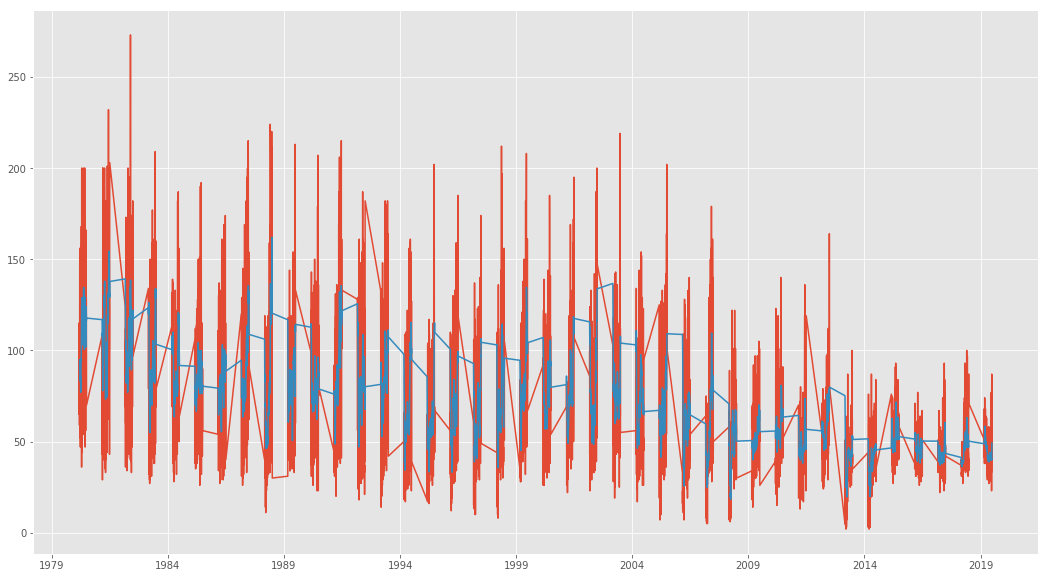

In [244]:
fig, ax = plt.subplots(figsize=[18,10])
ax.plot(akron['Date'], akron['AQI'])
ax.plot(akron['Date'], akron['rolling'])


In [245]:
combo_df = pd.read_csv('data/daily_aqi/combined2020aqi.tsv', sep='\t')

In [246]:
combo_df.head()

,Unnamed: 0,AQI,Category,DateObserved,HourObserved,Latitude,LocalTimeZone,Longitude,ParameterName,ReportingArea,StateCode
0,0,47,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
1,1,30,"{'Number': 1, 'Name': 'Good'}",2020-03-01,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
2,0,49,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
3,1,43,"{'Number': 1, 'Name': 'Good'}",2020-03-02,0,30.37,CST,-89.1,PM2.5,Mississippi Gulf Coast,MS
4,0,44,"{'Number': 1, 'Name': 'Good'}",2020-03-03,0,30.37,CST,-89.1,OZONE,Mississippi Gulf Coast,MS
